# ENPM673 Perception for Autonomous Robots (Spring 2024) - Midterm Exam

### Deadline: 16th March 7AM

Rohan Maan, Jay Prajapati, Samer Charifa, Tommy Chang

## Submission guidelines

-	The midterm exam is to be done and submitted individually.
-	Write the solution to **all the problems in one Google Colab File. (Handwritten answers will not be allowed)**
-	Your submission on ELMS/Canvas should be the following:
    a. Google Colab (.ipynb) file
    b. Google Colab (.pdf) file (Convert the same .ipynb file to a .pdf file)
    following the naming convention YourDirectoryID_midterm.
-	Points will be deducted if you don’t follow the submission guidelines.
-	Submit all files in one attempt.
-	Provide detailed explanations for each step using text cells in Google Colab.
-	Ensure the code is well-formatted for readability.
-	Comment on each section (preferably every 2 lines) of the code to explain its purpose and functionality.
-	Include relevant output images within the text cells where required.
-	Note that the use of ChatGPT (or any other generative AI websites) is not allowed.
- You are free to use any in-built OpenCv functions **except for PCA (In Question-3)**.


## How to use this file

- Links to all the input data have been given in the text cells.
- Add this .ipynb file to your working directory on google drive.
- Add the given input files to your working directory on google drive.
- Make sure you are using Google Colab and not any other IDE.
- Placeholders to write the answers have been given in this file.
- Do not change the structure of the questions.
- You may add extra code cells or text cells for any particular question.
- Make sure that the extra cell is added under the right question.

## Enter Student Details Here

|Name|your_name|
|---|---|
|UID|120189500|
|Email|pgoenka@umd.edu|

# Set path to the working directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [49]:
path_to_folder = "perception-midterm"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/perception-midterm


# Import Libraries

In [ ]:
# Import all your libraries here ....

import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import csv
import plotly.graph_objects as go
import pandas as pd
from google.colab.patches import cv2_imshow

# Problem 1 (20 Points)

Link to input image: https://drive.google.com/file/d/1X0xir8CrOoKsNXxvZnLVAJWKztpMuUhV/view?usp=drive_link

#### Part 1: Write code and describe the steps to perform histogram equalization of the given color image.  Hint: First convert to a color space that separates the intensity from the color channels (eg. LAB or LUV color spaces work the best).  Your result should look like the below:

Link to the output of part-1: https://drive.google.com/file/d/1nIhoE0PyCdFE3LfAwGcUqUt_GaQ2NoG-/view?usp=sharing


# Answer

Steps for Histogram Equalization-

1. Read the BGR image
2. Convert BGR image to LAB image
3. Apply histogram equalization on the L channel (split and then merge the L, A and B channels before and after the operation)
4. Convert back to BGR image from LAB image

Original Image


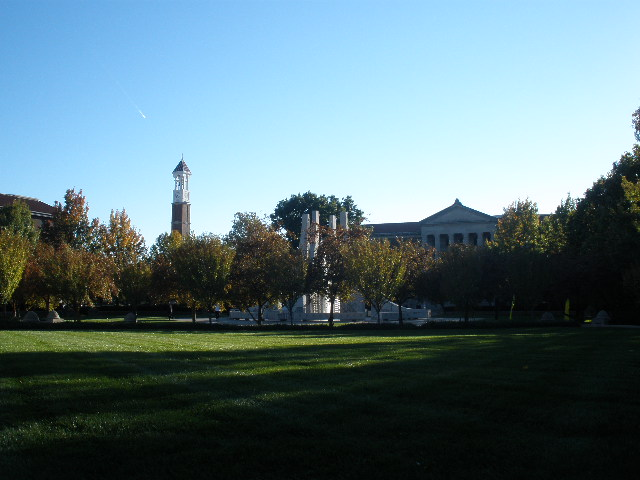


Histogram Equalized Image


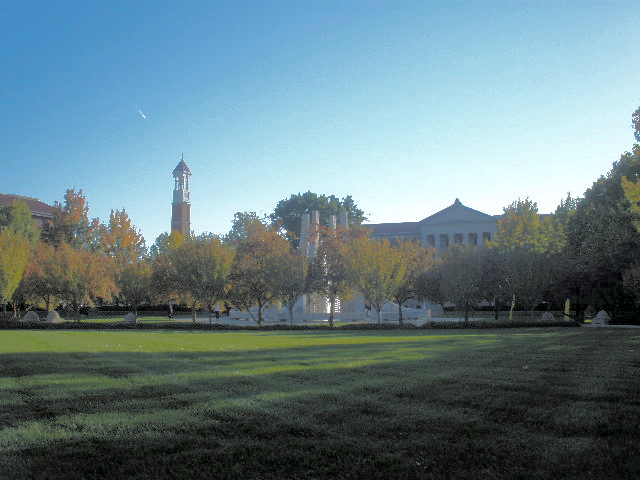

In [ ]:

# Read image
original_ig = cv2.imread("PA120272.JPG")

# Changing image from BGR to LAB
l_ab_ig = cv2.cvtColor(original_ig, cv2.COLOR_BGR2LAB)

# Get the l channel
l, a, b = cv2.split(l_ab_ig)

# On l channel apply histogram equalisation
l_hist_eq = cv2.equalizeHist(l)

# Merge modified L channel with A and B
merged_l_ab_ig = cv2.merge((l_hist_eq, a, b))

# Change LAB to BGR
final_ig = cv2.cvtColor(merged_l_ab_ig, cv2.COLOR_LAB2BGR)

# Display images
print ("Original Image")

cv2_imshow( original_ig)
print()
print("Histogram Equalized Image")
cv2_imshow(final_ig)


#### Part 2: Another way to enhance a dark image is to perform gamma correction.   For each intensity pixel, replace it with the new intensity = 255*((intensity/255)^(1/2.2)). Write code to perform gamma correction.  Your result should look like below:

Link to the output of part-2: https://drive.google.com/file/d/1rgo7Kl8qK7Byh5QZsIb4CrfdBzY51Aco/view?usp=sharing


Original Image


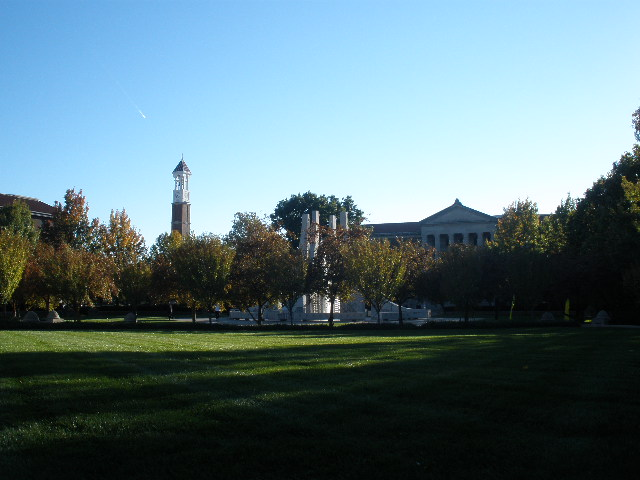


Gamma corrected image


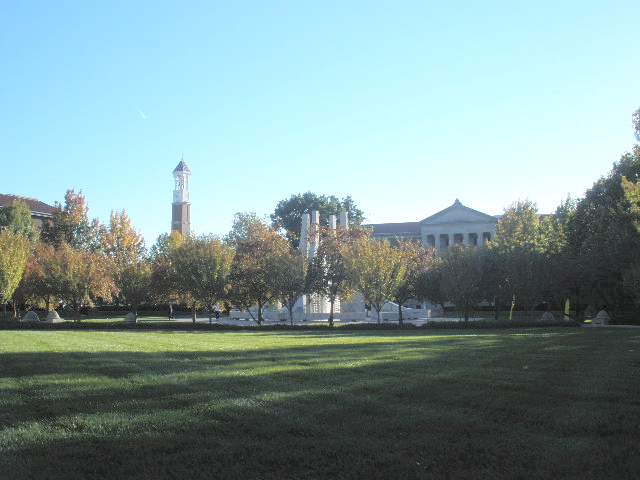

In [ ]:
# Copy LAB image
gamma_ig = l_ab_ig.copy()

# Split to channels
l, a, b = cv2.split(gamma_ig)

# Make copy of L channel
gamma_l = l.copy()

for width in range(l.shape[0]):
    for height in range(l.shape[1]):
          # Modify L channel using gamma correction
          gamma_l[width,height] = 255*((l[width,height]/255)**(1/2.2))

# Merge gamma corrected L with A and B
merged_gamma_ig = cv2.merge((gamma_l, a, b))

# Change LAB to BGR
gamma_ig = cv2.cvtColor(merged_gamma_ig, cv2.COLOR_LAB2BGR)

# Display the original and gamma-corrected images
print ("Original Image")
cv2_imshow( original_ig)
print ()
print("Gamma corrected image")
cv2_imshow( gamma_ig)



# Problem 2 (15 Points)

#### 1. For an image that is n by n and assuming that we have a random kernel call it H, where H is m by m matrix, what is the big O notation when performing convolution (how many multiplications are needed, in terms of n)?

#### 2. Describe the meaning of “separable” kernel? Redo the previous question knowing that the H kernel is separable?

#### 3. Apply the principle of separability to the following kernel to separate it into two kernels.


Kernel

<img src="https://drive.google.com/uc?id=1MMCS5erDiy2Pk_ytuyI_GSI8FdjGRUib" width="300" height="200" />

#### Problem-2 (1)

O(m^2 * n^2)

#### Problem-2 (2)

A separable kernel is a 2D kernel which can be factored into two 1-D kernels representing its row and column.

O(2m * (n^2) )

#### Problem-2 (3)

The sum of kernel elements is 16. Hence multiplyinf factor is 1/16

For 1D kernel the multiplying factor should be 1/4

=> K = K row * K column

= 1/4 * [1 2 1] * 1/4 * [1 2 1]^T

Hence,

K row = [0.25 0.5 0.25]


K column =

[ 0.25

0.5

0.25]

# Problem 3 (20 Points)

Link to the csv file: https://drive.google.com/file/d/1LGG32bpU0sTIp-lOxOXCZJELGoZqVaZk/view?usp=sharing

#### Given x, y, z coordinates of n number of data points(problem3_points.csv). Consider matrix A where matrix A represents the coordinates of the n points shown in the figure below. Let’s say we want to fit these data points onto an ellipse.

#### 1. Describe the steps to find the major and minor axis of this ellipse along with their prospective length.

#### 2. Similarly, given the data that represents a flat ground in front of the robot in 3D, try to extract the equation of the surface that describe the ground.

#### Problem-3 (1)

Steps for major and minor axis-

1. Preprocess the data- Read CSV file containing x, y and z coordinates.
2. Compute the centroid of the data. Then compute covariance matrix to estimate ellipse orientation.
3. Compute eigenvalue decomposition of covariance matrix. You will get principal axes and their lengths.
4. The eigenvectors with the smallest and largest eigenvalues indicate the minor and major axes.
5. Based on major axis orientation, compute rotation angle of ellipse.
6. Compute the center, eccentricity and major and minor axes lengths.

#### Problem-3 (2)

In [53]:
# Read CSV data
csv_info = pd.read_csv('problem3_points.csv')

# Read the x, y and z values
x_coord = csv_info['X']
y_coord = csv_info['Y']
z_coord = csv_info['Z']

# Get the mean
x_coord_m = np.mean(x_coord)
y_coord_m = np.mean(y_coord)
z_coord_m = np.mean(z_coord)

# Centralize
x_coord_cen = x_coord-x_coord_m
y_coord_cen = y_coord-y_coord_m
z_coord_cen = z_coord-z_coord_m

# Make the matrix
cen = np.ones_like(x_coord_cen)
mat_A = np.column_stack((x_coord_cen, y_coord_cen, cen))

# solve for co-efficients
coeef,a,b,c= np.linalg.lstsq(mat_A, z_coord_cen, rcond=None)

# plane co-efficients
A= coeef[0]
B = coeef[1]
D = -1

# D adjustment
D = (A * x_coord_m + B * y_coord_m - z_coord_m) + D

#equation
eq = str(round(A,3))+ "x + " + str(round(B,3)) + "y -z + " + str(round(D,3))+" = 0"

print("Equation of surface that describes ground: ")

print(eq)

Equation of surface that describes ground: 
0.577x + 0.0y -z + -1.0 = 0


# Problem 4 (30 Points)

Link to the input image: https://drive.google.com/file/d/1VeZyrPIwyg7sqi_I6N5zBUJP9UHkyDEb/view?usp=sharing

#### Given the photo of a train track, describe the process to find the mean distance in pixels between the train tracks for every row of the image where train tracks appear. This question contains two parts:

#### 1. Design Pipeline and explain the requirement of each step
#### 2. Write code to implement the pipeline

#### Problem-4 (1)

Edit this text cell to enter pipeline details

1. preprocessing- We load image and convert to grayscale. We also apply gaussian blur for better edge detection.

2. detecting edges - we use canny edge detector to detect edges.

3. line detection - we use hough transform to get straight lines from the edge detected image. We then get the distinct lines of the two tracks and colour it gray.

4. Perspective transform - We perform perspective transform to get top view of the tracks.

5. Computing mean width of track - We look at the gray pixels in the left half and right half of image and note their locations. We then find the x value difference among the gray pixels corresponding to the same row. We take mean of all the values and hence we get our answer.

#### Problem-4 (2)

Mean distance between the train tracks for every row: 744 px


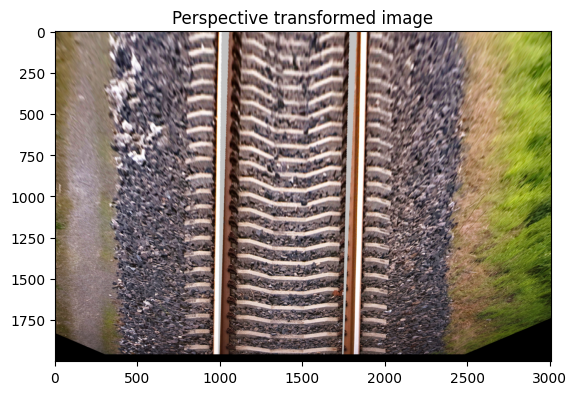

In [54]:
# Get image
original_train_track_ig = cv2.imread('train_track.jpg')
train_track_ig = original_train_track_ig.copy()

# Create Gray image
gray_train_track_ig = cv2.cvtColor(train_track_ig, cv2.COLOR_BGR2GRAY)

# Gaussian blur
g_blur_train_track_ig = cv2.GaussianBlur(gray_train_track_ig, (19,19), 0)
# Canny edge detector
edg_train_track_ig = cv2.Canny(g_blur_train_track_ig, 49, 149)
# get lines using hough lines
val = np.pi/180
hough_lns_train_track_ig = cv2.HoughLinesP(edg_train_track_ig, 1, val, 79, 99, 19)


hough_lns_all = []
max = np.inf
for ln in hough_lns_train_track_ig:
    for x_a, y_a, x_b, y_b in ln:
        slp = (y_b - y_a) / (x_b - x_a) if (x_b - x_a) != 0 else max
        hough_lns_all.append((x_a, y_a, x_b, y_b, slp))

hough_lns_all.sort(key=lambda line: line[4])

# Add line to image that has highest slope
Mx_a, My_a, Mx_b, My_b, M_slp = hough_lns_all[-1]

# Extend line with gray pixel values (195, 195, 195)
px_distance = 390
Mx_a_extended = int(Mx_a - px_distance)
My_a_extended = int(My_a - M_slp * px_distance)
Mx_b_extended = int(Mx_b + px_distance)
My_b_extended = int(My_b + M_slp * px_distance)

cv2.line(train_track_ig, (Mx_a_extended, My_a_extended), (Mx_b_extended, My_b_extended), (195,195,195), 10)

# Add line to image that has lowest slope
mx_a, my_a, mx_b, my_b, m_slp = hough_lns_all[0]

# Extend line with gray pixel values (195, 195, 195)
mx_a_extended = int(mx_a - px_distance)
my_a_extended = int(my_a - m_slp *px_distance)
mx_b_extended = int(mx_b + px_distance)
my_b_extended = int(my_b + m_slp * px_distance)

cv2.line(train_track_ig, (mx_a_extended, my_a_extended), (mx_b_extended, my_b_extended), (195,195,195), 10)

# Generate Start and End points for perspective transform
val1 = 1480
val2 = 1920
corner_a=((val1 - my_b)/ m_slp +mx_a )
corner_b = ((val1 - My_b)/ M_slp +Mx_a )
corner_c = (( val2- my_b)/ m_slp +mx_a )
corner_d = (( val2- My_b)/ M_slp +Mx_a )

perspective_start = np.float32([[int(corner_a), val1], [int(corner_b), val1], [int(corner_c), val2], [int(corner_d), val2] ])
perspective_end = np.float32([[int(corner_c), val1], [int(corner_b), val1], [int(corner_c), val2], [int(corner_b), val2] ])

# Perspective transform
homography_p = cv2.getPerspectiveTransform(perspective_start, perspective_end)
width = train_track_ig.shape[1]
height = train_track_ig.shape[0]
view_from_top = cv2.warpPerspective(train_track_ig,homography_p, (width,height))

identified_px = []

r_start = 1890
r_end = 1300
step = -1

# Check for grey pixels in the image

# In left half of image
for height in range(r_start, r_end, step):
    s_start = 1499
    s_end = -1
    for width in range(s_start, s_end, step):
        # See if pixel is grey
        if all(view_from_top[height, width] == [195,195,195]):
            identified_px.append(width)
            break
    if identified_px:
        break

# In right half of image
for height in range(r_start, r_end, step):
    s_start = 1600
    s_end = view_from_top.shape[1]
    for width in range(s_start, s_end):
    # See if pixel is grey
        if all(view_from_top[height, width] == [195,195,195]):
            identified_px.append(width)
            break
    if len(identified_px) == 2:
        break

mean_d = None
x_a, x_b = identified_px
mean_d = abs(x_b - x_a)


plt.figure()
plt.title("Perspective transformed image")
plt.imshow(cv2.cvtColor(view_from_top, cv2.COLOR_BGR2RGB))

print("Mean distance between the train tracks for every row: " +  str(mean_d) + " px")

# Problem 5 (15 Points)

#### Let’s say you want to design a system that will create a top view of the surrounding around the car, see the image below for referene. Do the following,

(1) Describe and point the location of the sensors on the car in the given picture. Also, show the field of view of the sensors.

(2) Write the pipeline that will take input from these sensors and output a top-view image similar to the one shown below.

Note: Explain the answer in detail and provide necessary justifications for the steps you use in the pipeline.

<img src="https://drive.google.com/uc?id=1USIA11QzqbXxzpkkqOX2qedu3bvhGlDW" width="150" height="250" />

1) In order to have a 360* view of the car surroundings, we need cameras that capture the entirety of the surrounding. In general, 4 cameras are used to achieve this objective. As seen below, one camera is placed infront of the car above the number-plate area, one at the back above the number-plate area and two cameras on the side (on the lower surface of the rearview mirror). One example of this placement of cameras can be found in [Hyundai cars](https://www.youtube.com/watch?v=Y82vK_E6c08&t=18s).

Using this placement of cameras with a FOV of 180 to 190 degrees, the entirety of the surroundings can be captured. The FOV of the cameras are marked by black lines below.


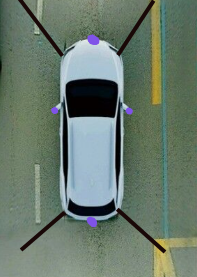

In [ ]:
cv2_imshow(cv2.imread('car_sensors2.png'))



Pipeline

1. Get image form sensors- firstly we read the image data from all the cameras.

2. Bird eye view transformation- We then transform the image from each camera's perspective frame to vehicle's top-down view.

3. Image stitching- We then stitch the images together to create a single panoramic view.

4. Obstacle detection and display- We can detect obstaclres around car and display the output feed on screen to the driver.